In [1]:
! pip install jsonlines

Defaulting to user installation because normal site-packages is not writeable


# making segment image

In [ ]:
import os
import jsonlines
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Open the JSONL file
with jsonlines.open('polygons.jsonl') as reader:
    # Iterate over each line in the file
    for k,line in enumerate(reader):
        image_id = line['id']
        annotations = line['annotations']
        print(image_id, k + 1)
        
        # Create a directory for the current image
        #image_dir = f'{base_dir}/{image_id}'
        #os.makedirs(image_dir, exist_ok=True)

        # Iterate over each annotation in the line
        for i,annotation in enumerate(annotations):
            annotation_type = annotation['type']
            coordinates = annotation['coordinates']
            
            # Create a directory for the current image
            image_dir = f'train/{annotation_type}'
            os.makedirs(image_dir, exist_ok=True)

#             # Process the coordinates to create a polygon
#             # Flatten the nested list of coordinates
#             flattened_coordinates = [coord for sublist in coordinates for coord in sublist]

#             # Convert flattened coordinates to NumPy array
#             xy = np.array(flattened_coordinates)

#             # Reshape the flattened coordinates to (N, 2) shape
#             xy = xy.reshape((-1, 2))

#             # Create the polygon
#             polygon = Polygon(xy, closed=True, fill=None, edgecolor='r')

#             # Display the polygon
#             fig, ax = plt.subplots()
#             ax.add_patch(polygon)
#             ax.set_aspect('equal')
#             plt.title(f'Image ID: {image_id}, Annotation Type: {annotation_type}')
#             plt.show()
            # Process the coordinates to create a polygon
            fig, ax = plt.subplots()
            ax.set_xlim(0, 512)
            ax.set_ylim(0, 512)

            # Iterate over each segment in the annotation
            for segment in coordinates:
                # Flatten the nested list of coordinates
                flattened_coordinates = [coord for sublist in segment for coord in sublist]

                # Convert flattened coordinates to NumPy array
                xy = np.array(flattened_coordinates)

                # Reshape the flattened coordinates to (N, 2) shape
                xy = xy.reshape((-1, 2))

                # Create the polygon
                polygon = Polygon(xy, closed=True, fill=None, edgecolor='r')

                # Add the polygon to the plot
                ax.add_patch(polygon)

            # Display the plot
            #ax.set_aspect('equal')
            #plt.title(f'Image ID: {image_id}, Annotation Type: {annotation_type}')
            #plt.show()
            
            
           # Save the plot as an image in the corresponding folder
            plt.savefig(f'{image_dir}/{image_id}_{annotation_type}_{i+1}.png')
            
            # Close the plot
            plt.close()

# merging same image

In [3]:
import os
import cv2

folder_path = '/run/media/limsim/extra/kaggle_segmentation/train_segment/blood_vessel/'

# Create a dictionary to store the image IDs and their corresponding image files
image_dict = {}

# Iterate through each image file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        file_path = os.path.join(folder_path, filename)
        
        # Extract the image ID from the file path
        image_id = filename.split('_')[0]
        
        # Check if the image ID already exists in the dictionary
        if image_id in image_dict:
            # Append the current image file to the list of files associated with that ID
            image_dict[image_id].append(file_path)
        else:
            # Create a new entry in the dictionary with the image ID as the key
            # and a list containing the current image file as the value
            image_dict[image_id] = [file_path]

# Iterate through the dictionary items
for image_id, image_files in image_dict.items():
    merged_image = None
    
    # Load and concatenate the images
    for image_file in image_files:
        image = cv2.imread(image_file)
        
        if merged_image is None:
            merged_image = image
        else:
            merged_image = cv2.hconcat([merged_image, image])  # Concatenate horizontally
        
        # Alternatively, you can use cv2.vconcat() to concatenate vertically
        
    # Save the merged image
    merged_file_path = os.path.join(folder_path, f'{image_id}_merged.png')
    cv2.imwrite(merged_file_path, merged_image)


KeyboardInterrupt: 

In [4]:
import os
import cv2
import numpy as np

folder_path = '/run/media/limsim/extra/kaggle_segmentation/train_segment/blood_vessel/'

# Create a dictionary to store the image IDs and their corresponding image files
image_dict = {}

# Iterate through each image file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        file_path = os.path.join(folder_path, filename)
        
        # Extract the image ID from the file path
        image_id = filename.split('_')[0]
        
        # Check if the image ID already exists in the dictionary
        if image_id in image_dict:
            # Append the current image file to the list of files associated with that ID
            image_dict[image_id].append(file_path)
        else:
            # Create a new entry in the dictionary with the image ID as the key
            # and a list containing the current image file as the value
            image_dict[image_id] = [file_path]

# Iterate through the dictionary items
for image_id, image_files in image_dict.items():
    merged_image = None
    
    # Load and merge the images
    for image_file in image_files:
        image = cv2.imread(image_file)
        
        if merged_image is None:
            merged_image = np.zeros_like(image)
        
        # Superimpose the current image on the merged image
        merged_image = cv2.add(merged_image, image)
    
    # Save the merged image
    merged_file_path = os.path.join(folder_path, f'{image_id}_merged.png')
    cv2.imwrite(merged_file_path, merged_image)


error: OpenCV(4.7.0) /io/opencv/modules/core/src/arithm.cpp:647: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


In [5]:
import os
import cv2
import numpy as np

folder_path = '/run/media/limsim/extra/kaggle_segmentation/train_segment/blood_vessel/'

# Create a dictionary to store the image IDs and their corresponding image files
image_dict = {}

# Iterate through each image file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        file_path = os.path.join(folder_path, filename)
        
        # Extract the image ID from the file path
        image_id = filename.split('_')[0]
        
        # Check if the image ID already exists in the dictionary
        if image_id in image_dict:
            # Append the current image file to the list of files associated with that ID
            image_dict[image_id].append(file_path)
        else:
            # Create a new entry in the dictionary with the image ID as the key
            # and a list containing the current image file as the value
            image_dict[image_id] = [file_path]

# Iterate through the dictionary items
for image_id, image_files in image_dict.items():
    merged_image = None
    
    # Load and merge the images
    for image_file in image_files:
        image = cv2.imread(image_file)
        
        if merged_image is None:
            # Resize the image to a common size
            merged_image = cv2.resize(image, (image.shape[1], image.shape[0]))
        
        # Resize the current image to match the size of the merged image
        resized_image = cv2.resize(image, (merged_image.shape[1], merged_image.shape[0]))
        
        # Superimpose the current image on the merged image
        merged_image = cv2.add(merged_image, resized_image)
    
    # Save the merged image
    merged_file_path = os.path.join(folder_path, f'{image_id}_merged.png')
    cv2.imwrite(merged_file_path, merged_image)


KeyboardInterrupt: 

In [8]:
import os
import cv2
import numpy as np

folder_path = '/run/media/limsim/extra/kaggle_segmentation/train_segment/blood_vessel/'

# Create a dictionary to store the image IDs and their corresponding image files
image_dict = {}

# Iterate through each image file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        file_path = os.path.join(folder_path, filename)
        
        # Extract the image ID from the file path
        image_id = filename.split('_')[0]
        
        # Check if the image ID already exists in the dictionary
        if image_id in image_dict:
            # Append the current image file to the list of files associated with that ID
            image_dict[image_id].append(file_path)
        else:
            # Create a new entry in the dictionary with the image ID as the key
            # and a list containing the current image file as the value
            image_dict[image_id] = [file_path]

# Iterate through the dictionary items
for image_id, image_files in image_dict.items():
    merged_image = None
    
    # Load and merge the images
    for image_file in image_files:
        image = cv2.imread(image_file)
        
        if merged_image is None:
            # Resize the image to a common size
            merged_image = cv2.resize(image, (image.shape[1], image.shape[0]))
        
        # Resize the current image to match the size of the merged image
        resized_image = cv2.resize(image, (merged_image.shape[1], merged_image.shape[0]))
        
        # Normalize the resized image pixel values
        resized_image = cv2.normalize(resized_image.astype('float32'), None, 0.0, 1.0, cv2.NORM_MINMAX)
        
        # Superimpose the current image on the merged image
        alpha = 1.0 / len(image_files)  # Weight for the current image
        merged_image = cv2.addWeighted(merged_image, 1.0 - alpha, resized_image, alpha, 0.0, dtype=cv2.CV_32F)
    
    # Convert the merged image back to the original data type
    merged_image = np.round(merged_image * 255).astype(np.uint8)
    
    # Save the merged image
    merged_file_path = os.path.join(folder_path, f'{image_id}_merged.png')
    cv2.imwrite(merged_file_path, merged_image)


In [13]:
# import os
# import cv2
# import numpy as np

# folder_path = '/run/media/limsim/extra/kaggle_segmentation/train_segment/new_blood_vessel/'

# # Iterate through each image file in the folder
# for filename in os.listdir(folder_path):
#     if filename.endswith('.png'):
#         file_path = os.path.join(folder_path, filename)
        
#         # Load the image
#         image = cv2.imread(file_path)
        
#         # Split the channels (assuming the image is in BGR format)
#         b, g, r = cv2.split(image)
        
#         # Perform contrast stretching on the red channel
#         r_stretched = cv2.equalizeHist(r)
        
#         # Merge the channels back together
#         enhanced_image = cv2.merge((b, g, r_stretched))
        
#         # Save the enhanced image
#         enhanced_file_path = os.path.join(folder_path, f'enhanced_{filename}')
#         cv2.imwrite(enhanced_file_path, enhanced_image)


# resize

In [30]:
import os
import cv2

folder_path = '/run/media/limsim/extra/kaggle_segmentation/train_segment/new_blood_vessel/'

# Iterate through each image file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        file_path = os.path.join(folder_path, filename)
        
        # Load the image
        image = cv2.imread(file_path)
        
        # Resize the image to 512 x 512
        resized_image = cv2.resize(image, (512, 512))
        
        # Save the resized image with the same name
        resized_file_path = os.path.join(folder_path, filename)
        cv2.imwrite(resized_file_path, resized_image)


# visualizing

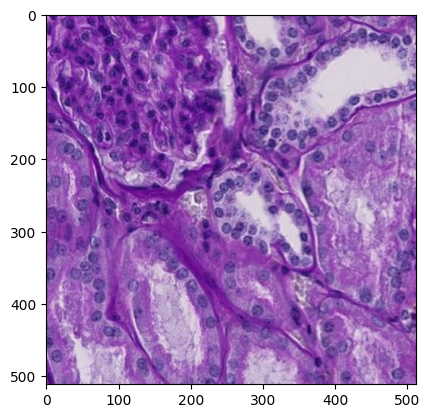

In [28]:
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open('/run/media/limsim/extra/kaggle_segmentation/train_image/0006ff2aa7cd.tif')
plt.imshow(image)

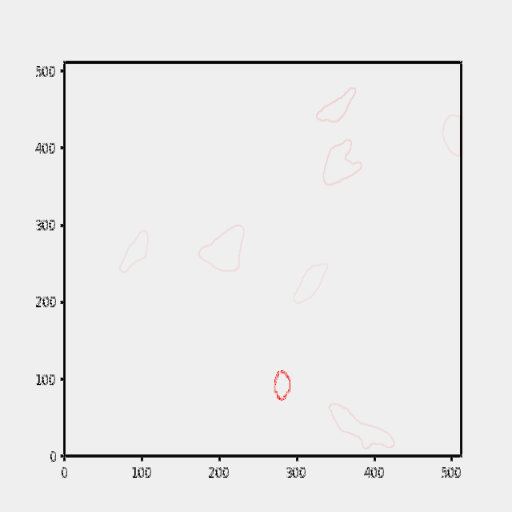

In [32]:
image = Image.open('/run/media/limsim/extra/kaggle_segmentation/train_segment/new_blood_vessel/0006ff2aa7cd_merged.png')
image

# U-Net

In [1]:
import torch
import torch.nn as nn

class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()
        
        # Encoder
        self.encoder1 = self.contracting_block(in_channels, 64)
        self.encoder2 = self.contracting_block(64, 128)
        self.encoder3 = self.contracting_block(128, 256)
        self.encoder4 = self.contracting_block(256, 512)
        
        # Bottleneck
        self.bottleneck = self.expanding_block(512, 1024)
        
        # Decoder
        self.decoder4 = self.expanding_block(1024, 512)
        self.decoder3 = self.expanding_block(512, 256)
        self.decoder2 = self.expanding_block(256, 128)
        self.decoder1 = self.expanding_block(128, 64)
        
        # Output
        self.output = nn.Conv2d(64, out_channels, kernel_size=1)
    
    def contracting_block(self, in_channels, out_channels):
        block = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        return block
    
    def expanding_block(self, in_channels, out_channels):
        block = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(out_channels, in_channels // 2, kernel_size=2, stride=2)
        )
        return block
    
    def forward(self, x):
        # Encoder
        encoder1 = self.encoder1(x)
        encoder2 = self.encoder2(encoder1)
        encoder3 = self.encoder3(encoder2)
        encoder4 = self.encoder4(encoder3)
        
        # Bottleneck
        bottleneck = self.bottleneck(encoder4)
        
        # Decoder
        decoder4 = self.decoder4(torch.cat([bottleneck, encoder4], dim=1))
        decoder3 = self.decoder3(torch.cat([decoder4, encoder3], dim=1))
        decoder2 = self.decoder2(torch.cat([decoder3, encoder2], dim=1))
        decoder1 = self.decoder1(torch.cat([decoder2, encoder1], dim=1))
        
        # Output
        output = self.output(decoder1)
        
        return output


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

# Set hyperparameters
learning_rate = 0.001
batch_size = 16
num_epochs = 10
validation_split = 0.2  # 20% of the training dataset will be used for validation

In [3]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms

# Define the transformations to apply to the images
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Path to the folder containing the segmented and non-segmented images
data_path = 'real_train_unet_pass_first'

# Define the dataset
dataset = ImageFolder(root=data_path, transform=transform)


In [4]:
# Split training dataset into training and validation sets
train_dataset, val_dataset = train_test_split(dataset, test_size=validation_split)

In [5]:
# Create data loaders for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

In [10]:
# Create U-Net model instance
model = UNet(512, 512)

In [11]:
# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [12]:
# Move model and loss function to device (e.g., GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion.to(device)

CrossEntropyLoss()

In [13]:
# Training loop
for epoch in range(num_epochs):
    # Set model to train mode
    model.train()
    
    for images, masks in train_loader:
        # Move images and masks to device
        images = images.to(device)
        masks = masks.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        
        # Compute loss
        loss = criterion(outputs, masks)
        
        # Backward pass
        loss.backward()
        
        # Update model parameters
        optimizer.step()
        
    # Set model to evaluation mode
    model.eval()
    
    # Validation loop
    with torch.no_grad():
        total_val_loss = 0.0
        total_samples = 0
        
        for images, masks in val_loader:
            # Move images and masks to device
            images = images.to(device)
            masks = masks.to(device)
            
            # Forward pass
            outputs = model(images)
            
            # Compute validation loss
            val_loss = criterion(outputs, masks)
            total_val_loss += val_loss.item() * images.size(0)
            total_samples += images.size(0)
        
        avg_val_loss = total_val_loss / total_samples
        
    # Print epoch statistics
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Val Loss: {avg_val_loss}')

RuntimeError: Given groups=1, weight of size [64, 512, 3, 3], expected input[16, 3, 512, 512] to have 512 channels, but got 3 channels instead